In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gc
import heapq

In [97]:
from IPython.core.display import display, HTML
display(HTML('<h1>The end of Course!</h1>'))

In [2]:
# question a
# Read text file and convert the data into the matrix X
file = open("nyt_data.txt","rb")

lines = []
for line in file:
    line = line.decode()[:-1]
    lines.append(line)
lines = np.array(lines)

X = np.zeros((8447, 3012))

for i in range(8447):
    line = lines[i]
    words = line.split(',')
    for j in range(len(words)):
        word = words[j].split(':')
        X[i][int(word[0]) - 1] = int(word[1])

# Read word index data
word_list = open("nyt_vocab.dat", "r")
word_list = word_list.readlines()
print (len(word_list))
for i in range(len(word_list)):
    word_list[i] = word_list[i][: -1]
word_list = np.array(word_list)
word_list.shape

3012


(3012,)

In [58]:
# Some initialization
K = 25

W = np.random.random((3012, K)) + 1
H = np.random.random((K, 8447)) + 1

X = X.T

f = []
T = 100

# NMF steps
for i in range(T):
    
    print(i)
    temp = X/(W.dot(H) + 10 ** -16)

    #s = W.sum(axis = 0)
    W_t_n = W.T/W.sum(axis = 0).reshape(1,-1).T
    H = H * W_t_n.dot(temp)

    temp = X/(W.dot(H) + 10 ** -16)

    #s = H.sum(axis = 1)
    H_t_n = H.T/H.sum(axis = 1).reshape(1,-1)
    W = W * temp.dot(H_t_n)
    temp = W.dot(H) + 10 ** - 16
    diff = -X * np.log(temp) + temp
    f.append(diff.sum())

# print(H)
# print(W)



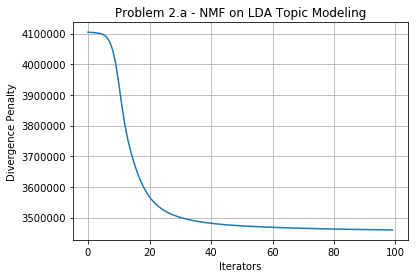

In [60]:
# Plot
plt.plot(range(T), f)
plt.grid("on")
plt.xlabel("Iterators")
plt.ylabel("Divergence Penalty")
plt.title("Problem 2.a - NMF on LDA Topic Modeling")
plt.savefig("P2_a1", dpi = 600)
plt.show()

In [54]:
# question b
# show of topics
W_n = W.T/W.sum(axis = 0).reshape(1,-1).T
topics = []
for i in range(K):
    topics.append(heapq.nlargest(10, range(len(W_n[i])), W_n[i].take))

topics

[[139, 22, 360, 254, 359, 269, 838, 317, 17, 421],
 [138, 3, 275, 184, 515, 364, 445, 523, 473, 594],
 [9, 58, 20, 352, 358, 13, 189, 409, 294, 389],
 [48, 209, 2, 109, 4, 27, 207, 180, 185, 30],
 [31, 80, 87, 222, 187, 42, 50, 59, 264, 146],
 [132, 75, 150, 216, 253, 319, 120, 383, 84, 92],
 [270, 233, 144, 466, 918, 876, 1166, 721, 41, 71],
 [70, 101, 21, 326, 6, 290, 562, 417, 277, 19],
 [49, 39, 86, 257, 134, 91, 2, 13, 308, 224],
 [218, 324, 171, 252, 459, 433, 754, 33, 585, 118],
 [0, 140, 113, 235, 320, 69, 500, 157, 408, 36],
 [265, 173, 535, 427, 74, 219, 865, 13, 163, 764],
 [4, 232, 35, 291, 198, 280, 8, 104, 32, 33],
 [362, 200, 128, 55, 220, 10, 33, 149, 29, 66],
 [1, 97, 152, 93, 110, 47, 312, 98, 34, 22],
 [79, 0, 131, 112, 212, 34, 36, 47, 328, 170],
 [24, 11, 12, 15, 75, 465, 430, 45, 84, 196],
 [5, 28, 3, 40, 103, 53, 25, 292, 228, 314],
 [161, 332, 649, 578, 262, 817, 760, 744, 723, 1070],
 [31, 18, 6, 476, 42, 87, 19, 68, 177, 371],
 [67, 6, 169, 258, 558, 405, 630,

In [55]:
# Show the result
topic_words_list = []

for i in range(K):
    topic_words = []
    for index in topics[i]:
        
        topic_words.append([word_list[index], round(W_n[i][index], 4)])
    topic_words_list.append(topic_words)

pd.DataFrame(topic_words_list)


,0,1,2,3,4,5,6,7,8,9
0,"[study, 0.0124]","[report, 0.0117]","[research, 0.01]","[cause, 0.0096]","[expert, 0.0096]","[test, 0.0075]","[scientist, 0.0075]","[develop, 0.0069]","[case, 0.0068]","[evidence, 0.0068]"
1,"[music, 0.0205]","[play, 0.018]","[performance, 0.0123]","[film, 0.0098]","[audience, 0.0098]","[production, 0.0093]","[stage, 0.0092]","[theater, 0.0091]","[dance, 0.0087]","[song, 0.0086]"
2,"[school, 0.0382]","[student, 0.0267]","[child, 0.0214]","[doctor, 0.0132]","[college, 0.0123]","[program, 0.0122]","[care, 0.0119]","[education, 0.0117]","[parent, 0.0115]","[patient, 0.0107]"
3,"[law, 0.0186]","[require, 0.0169]","[state, 0.0136]","[allow, 0.0119]","[official, 0.0115]","[issue, 0.0113]","[rule, 0.0109]","[agency, 0.0088]","[pass, 0.0088]","[public, 0.0085]"
4,"[thing, 0.0155]","[question, 0.0103]","[feel, 0.0101]","[happen, 0.0092]","[really, 0.0089]","[ask, 0.0089]","[put, 0.0086]","[problem, 0.0085]","[reason, 0.0076]","[mean, 0.0075]"
5,"[campaign, 0.0223]","[political, 0.0188]","[vote, 0.0181]","[election, 0.016]","[republican, 0.0155]","[candidate, 0.015]","[party, 0.0146]","[democratic, 0.0119]","[leader, 0.0118]","[support, 0.0105]"
6,"[food, 0.0129]","[water, 0.0092]","[serve, 0.0089]","[restaurant, 0.008]","[taste, 0.0074]","[fresh, 0.0072]","[dry, 0.0071]","[pound, 0.007]","[add, 0.0067]","[small, 0.0067]"
7,"[write, 0.0188]","[book, 0.0179]","[life, 0.0165]","[story, 0.0116]","[man, 0.0107]","[editor, 0.01]","[writer, 0.0083]","[character, 0.0078]","[love, 0.0073]","[woman, 0.0071]"
8,"[money, 0.0257]","[pay, 0.0254]","[cost, 0.0176]","[budget, 0.0167]","[tax, 0.0167]","[cut, 0.0146]","[state, 0.0132]","[program, 0.0121]","[benefit, 0.0108]","[fund, 0.0102]"
9,"[father, 0.0563]","[son, 0.0469]","[mrs, 0.0442]","[mother, 0.0436]","[daughter, 0.0365]","[graduate, 0.0301]","[marry, 0.0249]","[president, 0.0221]","[retire, 0.0219]","[receive, 0.0193]"


In [69]:
# Table 1
Table = []
for i in range(5):
    Table.append([])
    for j in range(5):
        
        Table[i].append([])
        for index in topics[i * 5 + j]:
            Table[i][j].append([word_list[index], round(W_n[i][index], 4)])
pd.DataFrame(Table)

,0,1,2,3,4
0,"[[study, 0.0124], [report, 0.0117], [research,...","[[music, 0.0], [play, 0.0002], [performance, 0...","[[school, 0.0], [student, 0.0], [child, 0.0], ...","[[law, 0.0], [require, 0.0011], [state, 0.0], ...","[[thing, 0.0], [question, 0.0048], [feel, 0.0]..."
1,"[[campaign, 0.0], [political, 0.0], [vote, 0.0...","[[food, 0.0], [water, 0.0], [serve, 0.0006], [...","[[write, 0.0022], [book, 0.0], [life, 0.0014],...","[[money, 0.0], [pay, 0.0006], [cost, 0.0], [bu...","[[father, 0.0], [son, 0.0], [mrs, 0.0], [mothe..."
2,"[[company, 0.0], [stock, 0.0], [share, 0.0003]...","[[computer, 0.0], [television, 0.0], [network,...","[[official, 0.0005], [announce, 0.0], [yesterd...","[[development, 0.0], [project, 0.0], [create, ...","[[percent, 0.0059], [rate, 0.0], [rise, 0.0], ..."
3,"[[sell, 0.0], [company, 0.0017], [sale, 0.0], ...","[[country, 0.0], [states, 0.0004], [american, ...","[[game, 0.0], [team, 0.0], [play, 0.0], [win, ...","[[art, 0.0], [artist, 0.0], [collection, 0.0],...","[[thing, 0.0], [tell, 0.0009], [man, 0.0], [we..."
4,"[[police, 0.0], [man, 0.0], [officer, 0.0], [k...","[[case, 0.0055], [court, 0.0], [lawyer, 0.0], ...","[[building, 0.0], [city, 0.0], [house, 0.0], [...","[[travel, 0.0], [hour, 0.0], [trip, 0.0], [tra...","[[war, 0.0], [military, 0.0], [force, 0.0019],..."


In [96]:

Frames = []
for j in range(5):
    #frame = []
    for i in range(5):
        df0 = pd.DataFrame(topic_words_list[j * 5 + i])
        df0.columns = ["topic {}".format(j * 5 + i + 1), "weight"]
        #frame.append(df0)
        #df = pd.concat(frame, axis = 1, keys = ["type1", "type2", "type3", "type4", "type5"], join = 'outer')

        Frames.append(df0)


In [94]:
# function to display all tables side by side

def multi_column_df_display(list_dfs, cols=5):
    html_table = "<table style='width:100%; border:0px'>{content}</table>"
    html_row = "<tr style='border:0px'>{content}</tr>"
    html_cell = "<td style='width:{width}%;vertical-align:top;border:0px'>{{content}}</td>"
    html_cell = html_cell.format(width=100/cols)

    cells = [ html_cell.format(content=df.to_html()) for df in list_dfs ]
    cells += (cols - (len(list_dfs)%cols)) * [html_cell.format(content="")] # pad
    rows = [ html_row.format(content="".join(cells[i:i+cols])) for i in range(0,len(cells),cols)]
    display(HTML(html_table.format(content="".join(rows))))

# Table 2
from IPython.core.display import HTML, display
#from IPython.core import display
multi_column_df_display(Frames)

,topic 1,weight
0,study,0.0124
1,report,0.0117
2,research,0.0100
3,cause,0.0096
4,expert,0.0096
5,test,0.0075
6,scientist,0.0075
7,develop,0.0069
8,case,0.0068
9,evidence,0.0068
